In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import seaborn as sns
import tensorflow as tf
from datetime import datetime
import os

In [2]:
# import the csv data into respective variables

stores_df = pd.read_csv('data/store.csv')
sales_df = pd.read_csv('data/train.csv', low_memory=False)
test_df = pd.read_csv('data/test.csv', low_memory=False)

In [3]:
# check test data shape

test_df.shape

(41088, 8)

In [4]:
# count sales data null values

sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [5]:
# count stores data null values

stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [6]:
# count test data null values

test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [7]:
#Define Date column by years months and days:
sales_df['year'] = pd.DatetimeIndex(sales_df['Date']).year
sales_df['day'] = pd.DatetimeIndex(sales_df['Date']).day
sales_df['month'] = pd.DatetimeIndex(sales_df['Date']).month

<AxesSubplot:xlabel='year', ylabel='Sales'>

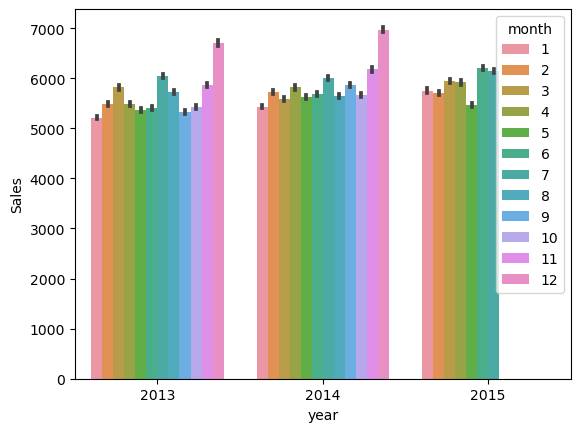

In [8]:
#bar plot of sales by months of every year:
sns.barplot(data=sales_df, y='Sales', x=sales_df['year'], hue=sales_df['month'])

<AxesSubplot:xlabel='day', ylabel='Sales'>

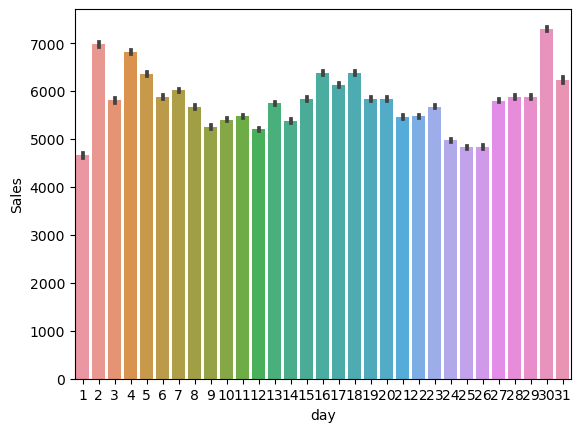

In [28]:
#bar plot of sales by days of every month:
sns.barplot(data=sales_df, y='Sales', x=sales_df['day'])

<AxesSubplot:>

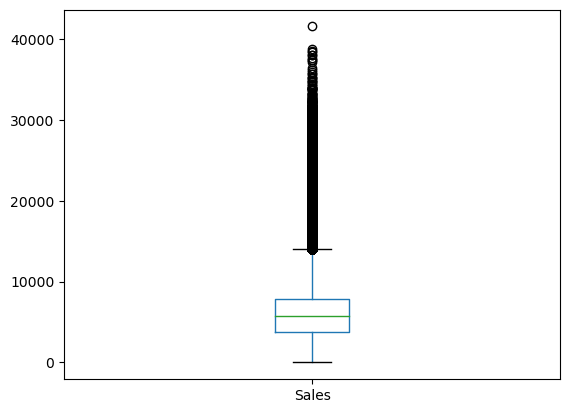

In [9]:
# plot the sales data to detect outliers

sales_df.boxplot( column =['Sales'], grid = False)

In [10]:
#function of outliers and the count:
##first and third quartile:
first_quartile =np.quantile(sales_df["Sales"], 0.25)
third_quartile = np.quantile(sales_df["Sales"], 0.75)
inter_quartile = third_quartile-first_quartile
upper=third_quartile+(1.5*inter_quartile)
lower=first_quartile-(1.5*inter_quartile)

outliers = sales_df["Sales"][(sales_df["Sales"] >= upper)]

print(round(upper),round(lower))
print(outliers)

14050 -2466
6          15344
23         14190
24         14180
83         14949
107        14927
           ...  
1015767    17934
1015796    25357
1015821    20355
1016093    20642
1016356    17267
Name: Sales, Length: 26694, dtype: int64


In [11]:
# get the outliers which values are greater than the upper bound values

sales_df['outliers']=sales_df["Sales"][(sales_df["Sales"] >= upper)]

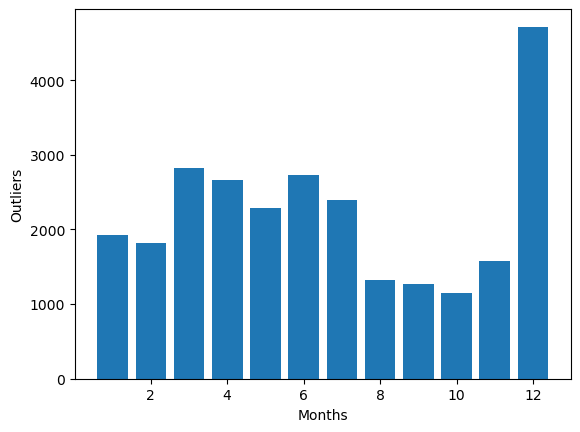

In [12]:
# plot the outliers data for each month, shows that december has most outliers because of holiday season

sales_table = sales_df[['month' , 'outliers' ]]
sales_table2 = sales_table[sales_table.outliers.notnull()]
monthlysales = sales_table2.month.value_counts()
month_df = monthlysales.to_frame()
month_df.sort_index(axis=0)
x = month_df.index 
y = month_df['month']
plt.bar(x, y) 
plt.xlabel('Months')
plt.ylabel('Outliers') 
plt.show() 

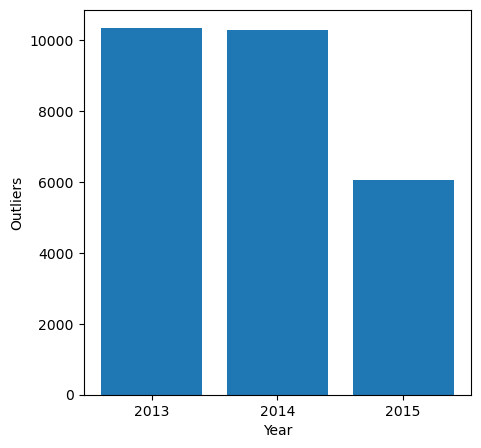

In [13]:
# plot the outliers data for each year

import math
import matplotlib

sales_table = sales_df[['year' , 'outliers' ]]

# Removing null values
sales_table2 = sales_table[sales_table.outliers.notnull()]

# Taking count of distict values
yearly_sales = sales_table2.year.value_counts()
yearly_df = yearly_sales.to_frame()

#Ploting graph
f, ax = plt.subplots(figsize=(5,5)) 
x = yearly_df.index 
y = yearly_df['year']
plt.bar(x, y) 
plt.xlabel('Year')
plt.ylabel('Outliers')
x_interval = range(min(x), math.ceil(max(x))+1)
matplotlib.pyplot.xticks(x_interval)
plt.show() 

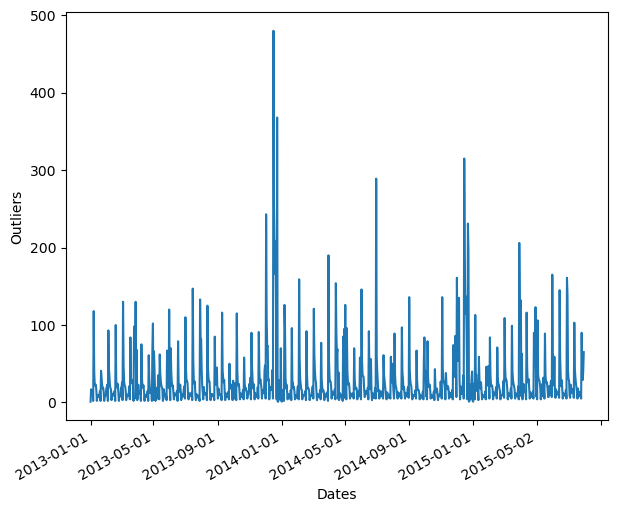

In [14]:
# plot the outliers data for each data shows 2014 has most outliers

import matplotlib.dates as mdates
sales_table = sales_df[['Date' , 'outliers' ]]
sales_table2 = sales_table[sales_table.outliers.notnull()]
yearlysales = sales_table2.Date.value_counts()
year_df = yearlysales.to_frame()
year_df.sort_index(inplace=True)
x = year_df.index 
y = year_df['Date'] 

#Ploting the graph for yearly sale datewise
fig, ax = plt.subplots(figsize=(7, 6))

#setting interval to 4 months
year_locator = mdates.MonthLocator(interval=4)

# locating major locator are year
ax.xaxis.set_major_locator(year_locator)
plt.xlabel('Dates')
plt.ylabel('Outliers')

#Ploting the graph uisng axes subplot
ax.plot(x, y);
fig.autofmt_xdate()

In [15]:
# Removed columns that were created for the purpose of plotting grapg and analysis

sales_df = sales_df.drop(["outliers"], axis = 1) 
sales_df = sales_df.drop(["month"], axis = 1)
sales_df = sales_df.drop(["day"], axis = 1)
sales_df = sales_df.drop(["year"], axis = 1)

In [16]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


<AxesSubplot:>

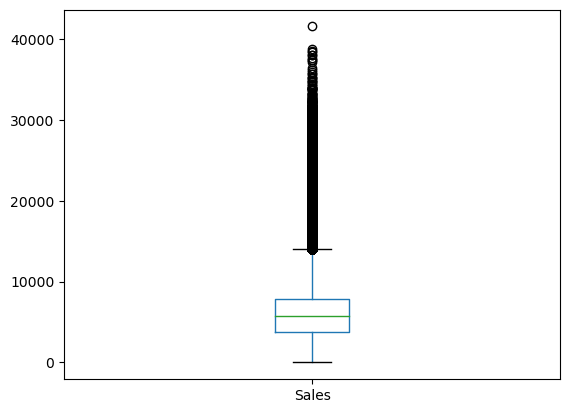

In [18]:
# plot the outleirs data to finally remove them or cap them to a upper bound values, it shows mostly outliers are crossing the upper bound only

sales_df.boxplot( column =['Sales'], grid = False)

In [19]:


#cap values below low to low
sales_df.loc[sales_df['Sales'] < lower, 'Sales'] = lower

# #cap values above high to high
sales_df.loc[sales_df['Sales'] > upper, 'Sales'] = upper


<AxesSubplot:>

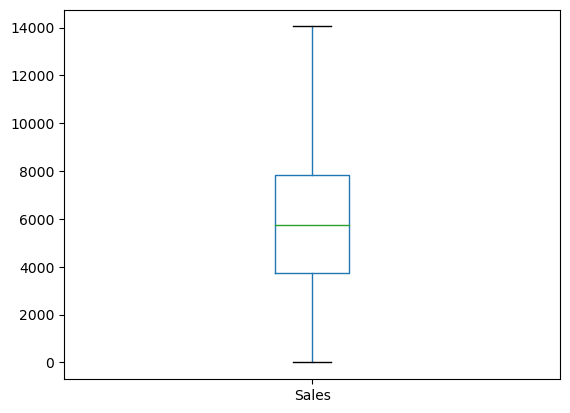

In [20]:
sales_df.boxplot( column =['Sales'], grid = False)

In [21]:
# get the unique values for promointerval

stores_df['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [22]:
# map the unique values for promointerval to integer count

stores_df['PromoInterval'] = stores_df['PromoInterval'].map({'Jan,Apr,Jul,Oct': 4,'Feb,May,Aug,Nov': 4, 'Mar,Jun,Sept,Dec': 4})

In [23]:
# fill the null values for promointerval with 0

stores_df['PromoInterval'] = stores_df['PromoInterval'].fillna(0)

In [24]:
# merge promo2 since week and promo2 since year to one attribute promo2 since month to check if thats useful attribute

stores_df['Promo2SinceMonth'] = np.array((12-((stores_df['Promo2SinceWeek'])/4)) + ((2022 - (stores_df['Promo2SinceYear'])) * 12))
stores_df = stores_df.drop('Promo2SinceWeek', axis = 1)
stores_df = stores_df.drop('Promo2SinceYear', axis = 1)

In [25]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555,1,1,0,1
1,2,5,2015-07-31,6064.0,625,1,1,0,1
2,3,5,2015-07-31,8314.0,821,1,1,0,1
3,4,5,2015-07-31,13995.0,1498,1,1,0,1
4,5,5,2015-07-31,4822.0,559,1,1,0,1


In [26]:
# get the info for sales df

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1017209 non-null  int64  
 1   DayOfWeek      1017209 non-null  int64  
 2   Date           1017209 non-null  object 
 3   Sales          1017209 non-null  float64
 4   Customers      1017209 non-null  int64  
 5   Open           1017209 non-null  int64  
 6   Promo          1017209 non-null  int64  
 7   StateHoliday   1017209 non-null  object 
 8   SchoolHoliday  1017209 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 69.8+ MB


In [27]:
sales_df['Open']

0          1
1          1
2          1
3          1
4          1
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Open, Length: 1017209, dtype: int64

In [28]:
# only take data for stores which are open

sales_df = sales_df[sales_df['Open'] == 1]

In [29]:
# get the info for sales df

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [30]:
# get the unique values for test df

test_df['Open'].unique()

array([ 1., nan,  0.])

In [31]:
# fill the null values with 0

test_df['Open'] = test_df['Open'].fillna(0)

In [32]:
# fill competition distance with the median values

stores_df['CompetitionDistance'] = stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median())

In [33]:
# merge CompetitionOpenSinceMonth and CompetitionOpenSinceYear to one attribute CompetitionOpenSinceYear to check if thats useful attribute

stores_df['CompetitionOpenSinceTodayMonths'] = np.array((12 - (stores_df['CompetitionOpenSinceMonth'])) + ((2022 - (stores_df['CompetitionOpenSinceYear'])) * 12))
stores_df = stores_df.drop('CompetitionOpenSinceMonth', axis = 1)
stores_df = stores_df.drop('CompetitionOpenSinceYear', axis = 1)

In [34]:
# fill CompetitionOpenSinceTodayMonths with median

stores_df['CompetitionOpenSinceTodayMonths'] = stores_df['CompetitionOpenSinceTodayMonths'].fillna(stores_df['CompetitionOpenSinceTodayMonths'].median())

In [35]:
# join stores data with train df to map store values in train data 

train_df = sales_df.merge(stores_df, how='left', on="Store", validate="many_to_one")

In [36]:
# join stores data with test df to map store values in test data 

test_df_merged = test_df.merge(stores_df, how='left', on="Store", validate="many_to_one")

In [37]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Promo2SinceMonth,CompetitionOpenSinceTodayMonths
0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,0,0.0,NaN,171.0
1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,1,4.0,152.75,181.0
2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,1,4.0,140.50,192.0
3,4,5,2015-07-31,13995.0,1498,1,1,0,1,c,c,620.0,0,0.0,NaN,159.0
4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,29910.0,0,0.0,NaN,92.0


In [38]:
test_df_merged.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Promo2SinceMonth,CompetitionOpenSinceTodayMonths
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,0,0.0,NaN,171.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,1,4.0,140.5,192.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,0,0.0,NaN,116.0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,0,0.0,NaN,98.0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,0,0.0,NaN,268.0


In [39]:
# get unique values for mapping
train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [40]:
# get unique values for mapping
train_df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [41]:
# get unique values for mapping
train_df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [42]:
# map unique values with one hot encoder for neural network
train_df['StateHoliday'] = train_df['StateHoliday'].map({'0': 0,'a': 1, 'b': 2,'c': 3})
train_df['Assortment'] = train_df['Assortment'].map({'a': 0, 'b': 1,'c': 2})
train_df['StoreType'] = train_df['StoreType'].map({'a': 0, 'b': 1,'c': 2, 'd': 3})

In [43]:
# map unique values with one hot encoder for neural network
test_df_merged['StateHoliday'] = test_df_merged['StateHoliday'].map({'0': 0,'a': 1, 'b': 2,'c': 3})
test_df_merged['Assortment'] = test_df_merged['Assortment'].map({'a': 0, 'b': 1,'c': 2})
test_df_merged['StoreType'] = test_df_merged['StoreType'].map({'a': 0, 'b': 1,'c': 2, 'd': 3})

In [44]:
# convert date to timestamp to convert the string to int
train_df['Date'] = pd.to_datetime(train_df['Date']).apply(lambda x: x.timestamp())
test_df_merged['Date'] = pd.to_datetime(test_df_merged['Date']).apply(lambda x: x.timestamp())

In [45]:
# get unique values for stateholiday
train_df['StateHoliday'].unique()

array([0, 1, 2, 3], dtype=int64)

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Store                            844392 non-null  int64  
 1   DayOfWeek                        844392 non-null  int64  
 2   Date                             844392 non-null  float64
 3   Sales                            844392 non-null  float64
 4   Customers                        844392 non-null  int64  
 5   Open                             844392 non-null  int64  
 6   Promo                            844392 non-null  int64  
 7   StateHoliday                     844392 non-null  int64  
 8   SchoolHoliday                    844392 non-null  int64  
 9   StoreType                        844392 non-null  int64  
 10  Assortment                       844392 non-null  int64  
 11  CompetitionDistance              844392 non-null  float64
 12  Pr

In [47]:
train_df.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

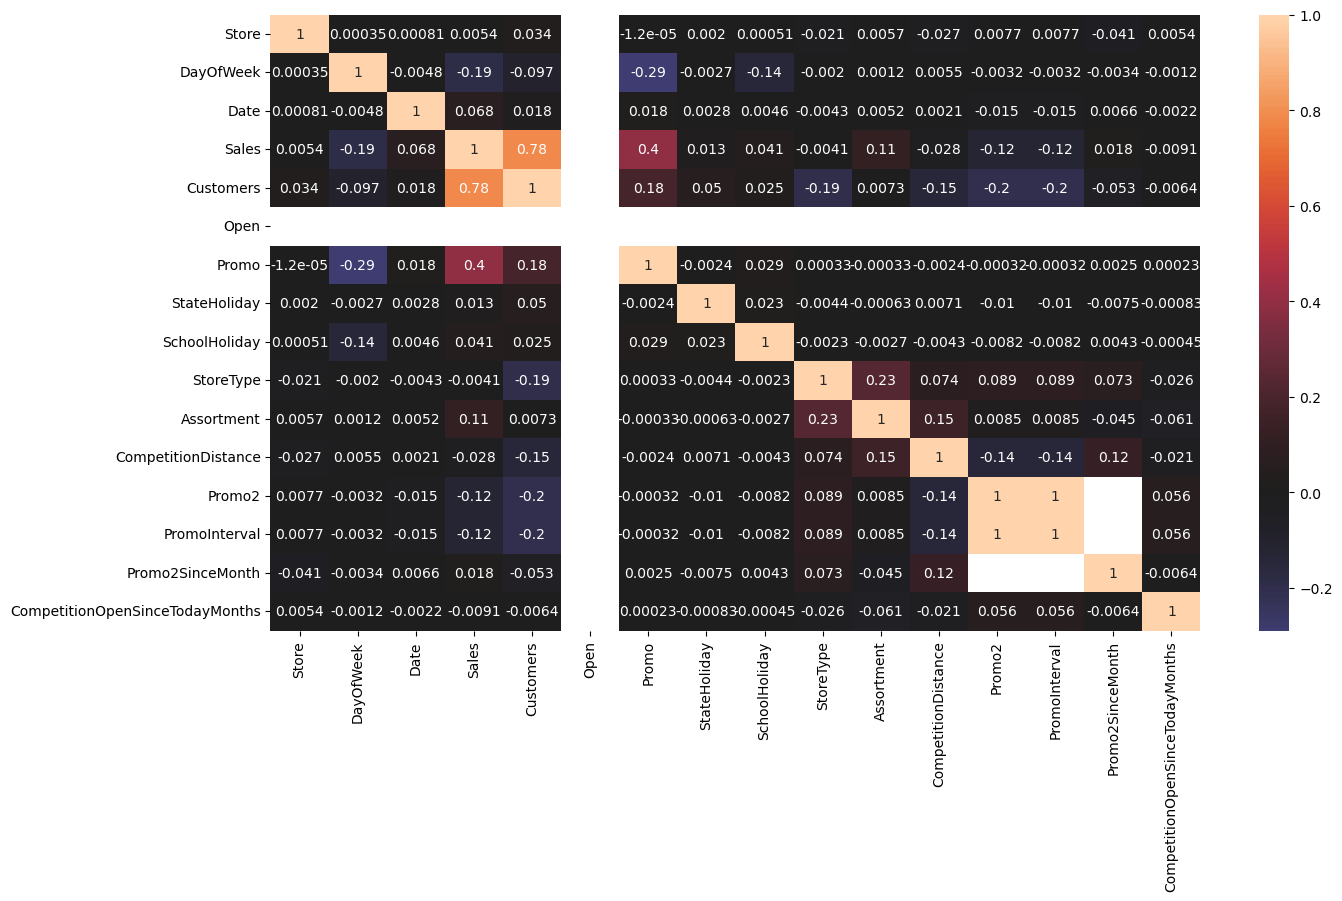

In [48]:
# plot the corelation matrix to check which columns to keep and which to drop
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline


corr = train_df.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, center=0,  annot=True)
plt.show()

In [49]:
# choose only those column selected from corelation matrix
train_df = train_df.loc[:, ['StateHoliday', 'Assortment', 'Promo','DayOfWeek', 'Sales', 'Promo2', 'PromoInterval']]

In [50]:
# choose only those column selected from corelation matrix
test_df_merged = test_df_merged.loc[:, ['StateHoliday','Assortment', 'Promo',  'DayOfWeek', 'Promo2', 'PromoInterval']]

In [51]:
# neural network with keras
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
# seperate target and train data
y = train_df['Sales']
train_df = train_df.drop('Sales', axis = 1)

In [53]:
train_df.head()

,StateHoliday,Assortment,Promo,DayOfWeek,Promo2,PromoInterval
0,0,0,1,5,0,0.0
1,0,0,1,5,1,4.0
2,0,0,1,5,1,4.0
3,0,2,1,5,0,0.0
4,0,0,1,5,0,0.0


In [54]:
# select the max and min values for normalization
train_df_max = train_df.max()
train_df_min = train_df.min()
y_min = y.min()
y_max = y.max()

In [55]:
# apply min max normalization
train_df = (train_df - train_df.min()) / (train_df.max() - train_df.min())
y = (y - y.min()) / (y.max() - y.min())
test_df_merged = (test_df_merged - train_df.min()) / (train_df.max() - train_df.min())

In [56]:
train_df.head()

,StateHoliday,Assortment,Promo,DayOfWeek,Promo2,PromoInterval
0,0.0,0.0,1.0,0.666667,0.0,0.0
1,0.0,0.0,1.0,0.666667,1.0,1.0
2,0.0,0.0,1.0,0.666667,1.0,1.0
3,0.0,1.0,1.0,0.666667,0.0,0.0
4,0.0,0.0,1.0,0.666667,0.0,0.0


In [57]:
train_df.shape

(844392, 6)

In [91]:
# define the keras model with three layers
model = Sequential()
model.add(Dense(8, input_shape=(train_df.shape[1],), activation='relu'))
#model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [92]:
# compile the keras model with rms prop as optimizer and MSE as error function
model.compile(loss='MeanSquaredError', optimizer='RMSprop', metrics=['mean_absolute_error'])

Epoch 1/5
1485/1485 [==============================] - 2s 965us/step - loss: 0.0671 - mean_absolute_error: 0.1964 - val_loss: 0.0383 - val_mean_absolute_error: 0.1570
Epoch 2/5
1485/1485 [==============================] - 1s 896us/step - loss: 0.0385 - mean_absolute_error: 0.1551 - val_loss: 0.0383 - val_mean_absolute_error: 0.1571
Epoch 3/5
1485/1485 [==============================] - 1s 890us/step - loss: 0.0385 - mean_absolute_error: 0.1551 - val_loss: 0.0381 - val_mean_absolute_error: 0.1563
Epoch 4/5
1485/1485 [==============================] - 1s 881us/step - loss: 0.0385 - mean_absolute_error: 0.1550 - val_loss: 0.0385 - val_mean_absolute_error: 0.1580
Epoch 5/5
1485/1485 [==============================] - 1s 887us/step - loss: 0.0385 - mean_absolute_error: 0.1551 - val_loss: 0.0384 - val_mean_absolute_error: 0.1578


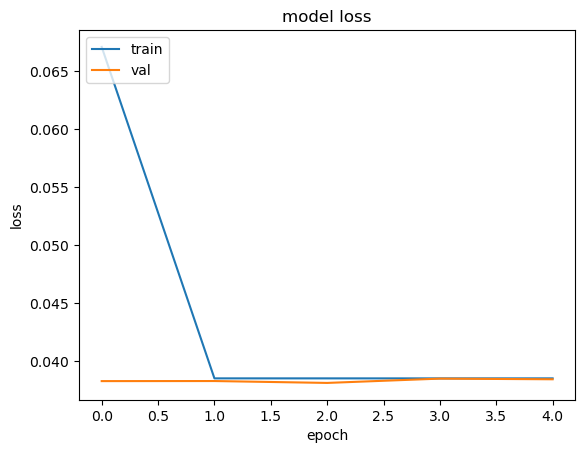

<Figure size 640x480 with 0 Axes>

In [93]:
# fit the keras model on the dataset with 6 epochs and batches of 512 
history = model.fit(train_df, y, epochs=5, batch_size=512, validation_split = 0.1, shuffle= True)

# plot and the final graph of MSE loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('training_group2.png')

In [94]:
# predict the test data
test_y = model.predict(test_df_merged)

1284/1284 [==============================] - 1s 529us/step


In [95]:
test_df_merged.head()

,StateHoliday,Assortment,Promo,DayOfWeek,Promo2,PromoInterval
0,0.0,0.0,1.0,4.0,0.0,0.0
1,0.0,0.0,1.0,4.0,1.0,4.0
2,0.0,2.0,1.0,4.0,0.0,0.0
3,0.0,0.0,1.0,4.0,0.0,0.0
4,0.0,2.0,1.0,4.0,0.0,0.0


In [96]:
train_df.head()

,StateHoliday,Assortment,Promo,DayOfWeek,Promo2,PromoInterval
0,0.0,0.0,1.0,0.666667,0.0,0.0
1,0.0,0.0,1.0,0.666667,1.0,1.0
2,0.0,0.0,1.0,0.666667,1.0,1.0
3,0.0,1.0,1.0,0.666667,0.0,0.0
4,0.0,0.0,1.0,0.666667,0.0,0.0


In [97]:
# denormalize the test data
test_y = test_y*(y_max-y_min) + y_min 

In [98]:
# absolute any negative value if there in test data
test_y = abs(test_y)

In [99]:
# get the ids for test data
z = [int(i+1) for i in range(len(test_y))]

In [100]:
# create df for test data for submission
test_df = pd.DataFrame({'Id': z, 'Sales': np.transpose(test_y)[0]})

In [101]:
# create test data submission file
test_df.to_csv('Submission4.csv', sep=',', encoding='utf-8', index=False)

In [111]:
# save the model architecture
# model.save('4_model_nn_group_project')

In [194]:
# # save the model weights and architecture
# model_json = model.to_json()
# with open("4_model_nn_group_project.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("4_model_nn_group_project.h5")
# print("Saved model to disk")

Saved model to disk


In [195]:
# # read the model weights and architecture

# from tensorflow.keras.models import Sequential, model_from_json
# json_file = open('4_model_nn_group_project.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("4_model_nn_group_project.h5")
# print("Loaded model from disk")

Loaded model from disk
